In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import cv2
import os
from os.path import isfile, join


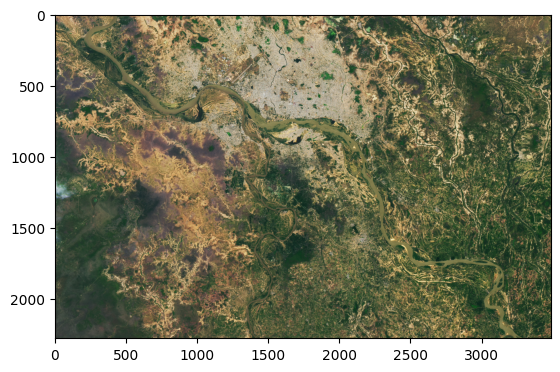

In [2]:
rgb_image=plt.imread("rgb.jpg")

plt.imshow(rgb_image)

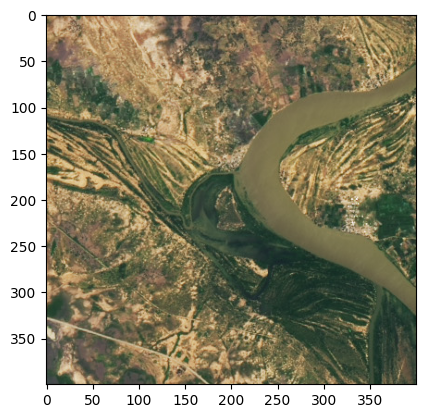

In [3]:
def cut_image(img,x,y,t1,t2):
    return img[x:t1+x,y:t2+y,:]

def save_image(img,name,format="png"):
    im = Image.fromarray(img)
    im.save(f"{name}."+format)


cutted_image=cut_image(rgb_image,0,0,400,400)

plt.imshow(cutted_image)
#save_image(cv2.cvtColor(cutted_image, cv2.COLOR_BGR2GRAY),"my_image","jpeg")


In [4]:
save_image(cutted_image,"my_image","png")
save_image(cutted_image,"my_image","jpeg")
save_image(cutted_image,"my_image","bmp")
save_image(cutted_image,"my_image","tiff")
save_image(cutted_image,"my_image","gif")

Taille image format png: 329.6162109375 KB


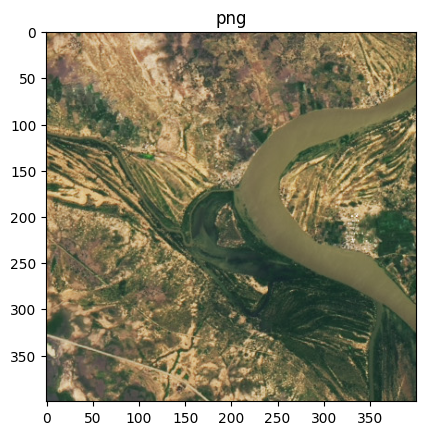

In [5]:

files = [f for f in os.listdir(".") if isfile(join(".", f)) and f.split(".")[0]=="my_image" ]

png_image=plt.imread(files[0])
plt.title(files[0].split(".")[1])
plt.imshow(png_image)
print("Taille image format png:", os.stat(files[0]).st_size/(1024),"KB")


Taille image format bmp: 468.802734375 KB


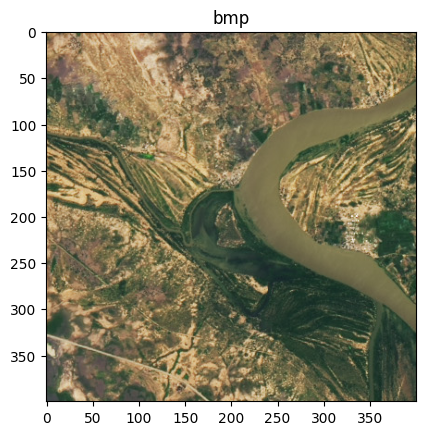

In [6]:
bmp_img=plt.imread(files[1])
plt.title(files[1].split(".")[1])
plt.imshow(bmp_img)
print("Taille image format bmp:", os.stat(files[1]).st_size/(1024),"KB")


Taille image format png: 167.4609375 KB


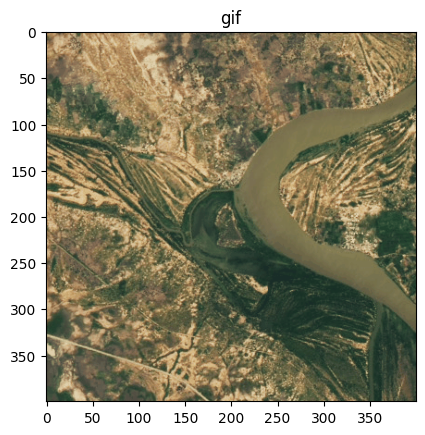

In [7]:
gif_img=plt.imread(files[2])
plt.title(files[2].split(".")[1])
plt.imshow(gif_img)
print("Taille image format png:", os.stat(files[2]).st_size/(1024),"KB")


Taille image format png: 468.88671875 KB


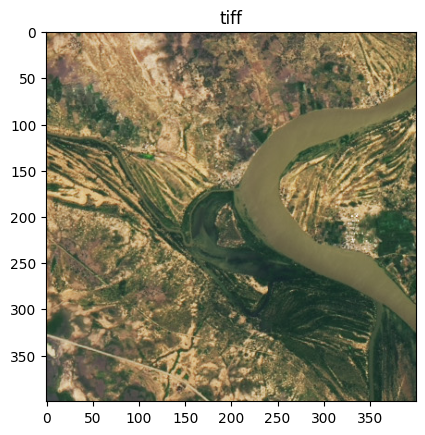

In [8]:
tiff_img=plt.imread(files[3])
plt.title(files[3].split(".")[1])
plt.imshow(tiff_img)
print("Taille image format png:", os.stat(files[3]).st_size/(1024),"KB")


Taille image format png: 39.1220703125 KB


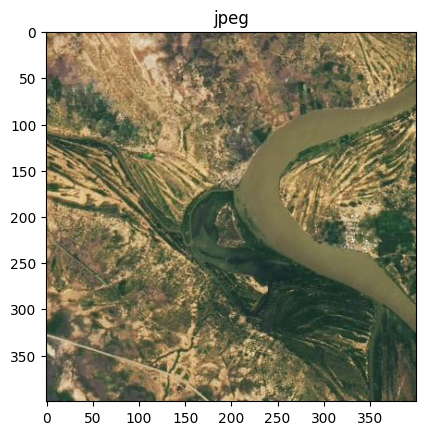

In [9]:
jpeg_img=plt.imread(files[4])
plt.title(files[4].split(".")[1])
plt.imshow(jpeg_img)
print("Taille image format png:", os.stat(files[4]).st_size/(1024),"KB")


<h3>Mean quared error:</h3>

In [12]:
def mean_squard_error(refrence,to_compare):
   return np.square(refrence-to_compare).mean()

print("mse(png,jpeg):",mean_squard_error(png_image*255,jpeg_img))  
print("mse(png,bmp):",mean_squard_error(png_image*255,bmp_img))  
#print("mse(png,tiff):",mean_squard_error(png_image*255,tiff_img))  
#print("mse(png,gif):",mean_squard_error(png_image*255,gif_img))  


mse(png,jpeg): 45.50909
mse(png,bmp): 0.0


Text(0.5, 1.0, 'jpeg')

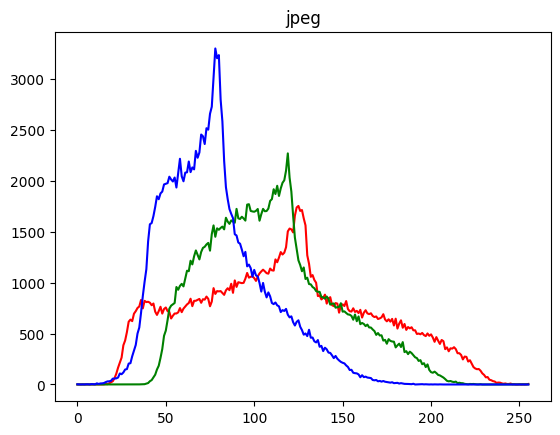

In [104]:
def rgb_components(img):
    img=img.copy()
    return img[:,:,0],img[:,:,1],img[:,:,2]

r_jpeg,g_jpeg,b_jpeg=rgb_components(jpeg_img)

def histo(img):
    return [np.count_nonzero(img==i) for i in range(256)]

r_histograme=histo(r_jpeg)
g_histograme=histo(g_jpeg)
b_histograme=histo(b_jpeg) 
plt.plot(np.arange(0,256,1),r_histograme,c="red")
plt.plot(np.arange(0,256,1),g_histograme,c="green")
plt.plot(np.arange(0,256,1),b_histograme,c="blue")
plt.title("jpeg")



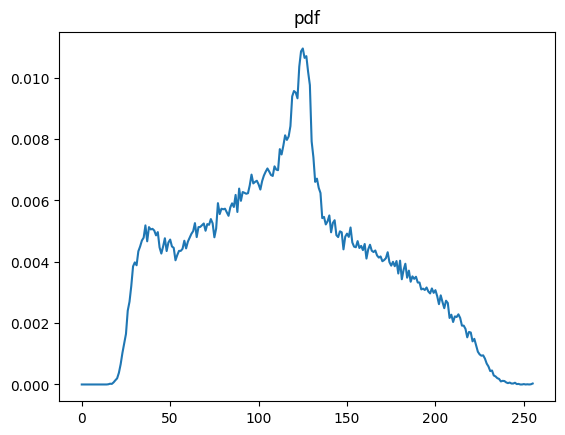

In [29]:


n=r_jpeg.shape[0]
m=r_jpeg.shape[1]

def pdf2(img,x):
    n=img.shape[0]*img.shape[1]
    counts=np.count_nonzero(img==x)
    return counts/n

values=np.arange(0,256,1)
probs=np.array([pdf2(r_jpeg,i) for i in range(256)])
plt.plot(values,probs)
plt.title("pdf")

def cdf(x,probs):
    return np.sum(probs[0:x])


def equa_pdf(x,probs):
    L=256
    return np.round((cdf(x,probs))*(L-1))
    


  

    

In [68]:
arr=np.array([equa_pdf(i,probs) for i in range(0,256)])

# hist,bins = np.histogram(arr,256,range=(0,256))

# plt.hist(arr.flatten(),bins,[0,256], color = 'r')

# plt.show()


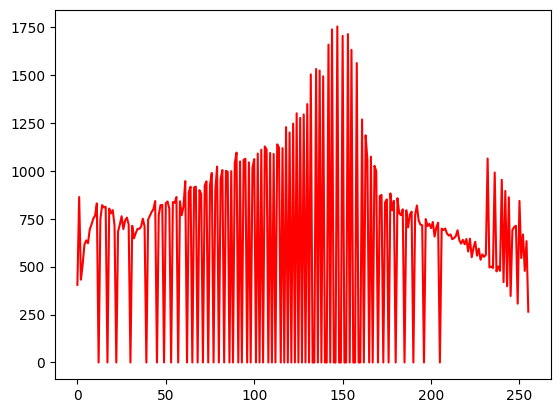

In [101]:
r=r_jpeg.copy()
for i in range(400):
    for j in range(m):
        r[i][j]=int(arr[r_jpeg[i][j]])


r_histo=histo(r)

plt.plot(np.arange(0,256,1),r_histo,c="red")



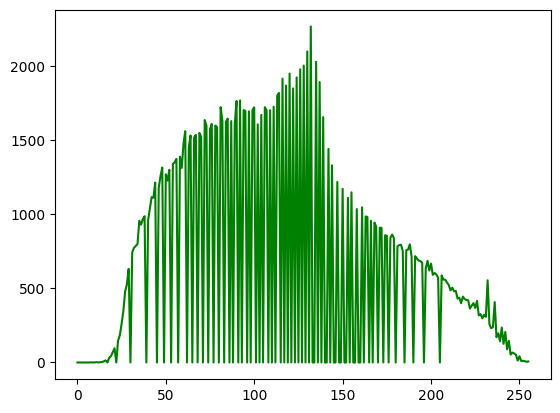

In [102]:
g=g_jpeg.copy()
for i in range(400):
    for j in range(m):
        g[i][j]=int(arr[g_jpeg[i][j]])


g_histo=histo(g)

plt.plot(np.arange(0,256,1),g_histo,c="green")



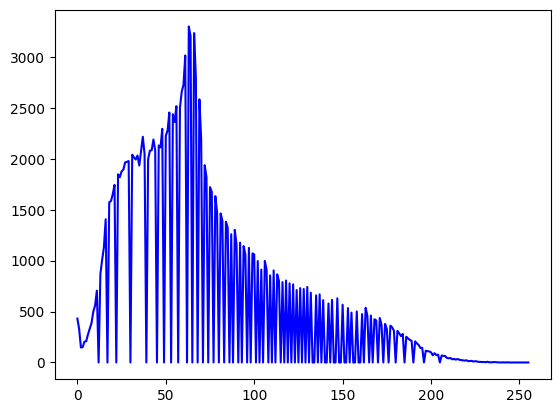

In [103]:
b=b_jpeg.copy()
for i in range(400):
    for j in range(m):
        b[i][j]=int(arr[b_jpeg[i][j]])


b_histo=histo(b)

plt.plot(np.arange(0,256,1),b_histo,c="blue")



Text(0.5, 1.0, 'jpeg')

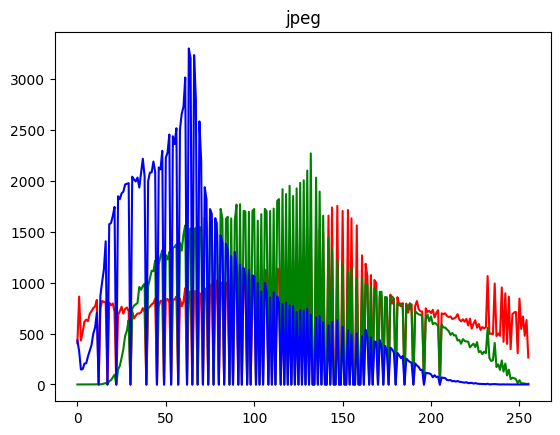

In [58]:
img=np.dstack([r,g,b])


r_histograme=[histo(r,i) for i in range(256)]
g_histograme=[histo(g,i) for i in range(256)]
b_histograme=[histo(b,i) for i in range(256)]
plt.plot(np.arange(0,256,1),r_histograme,c="red")
plt.plot(np.arange(0,256,1),g_histograme,c="green")
plt.plot(np.arange(0,256,1),b_histograme,c="blue")
plt.title("jpeg")


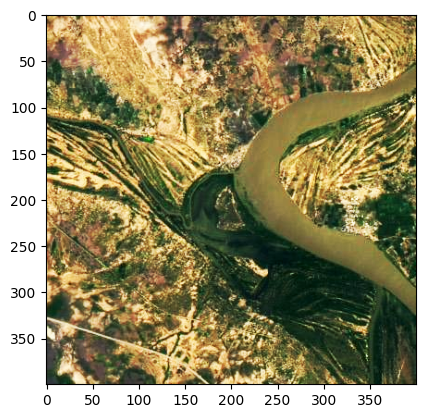

In [121]:
plt.imshow(img)

Text(0.5, 1.0, 'blue  equalized')

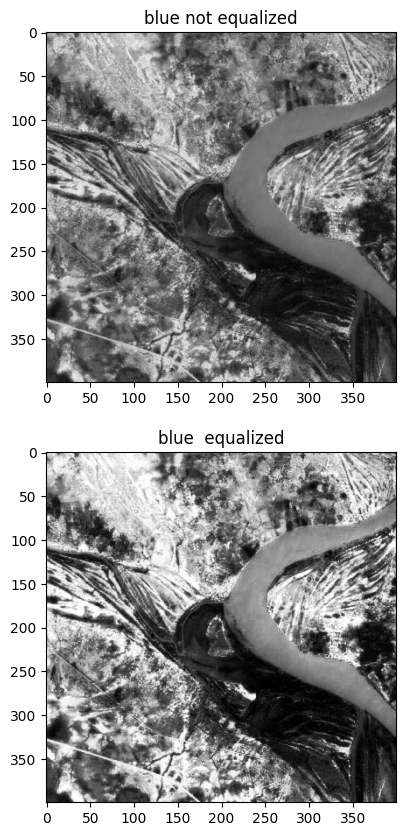

In [120]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(r_jpeg,cmap="gray")
plt.title("blue not equalized")
plt.subplot(2,1,2)
plt.imshow(r,cmap="gray")
plt.title("blue  equalized")

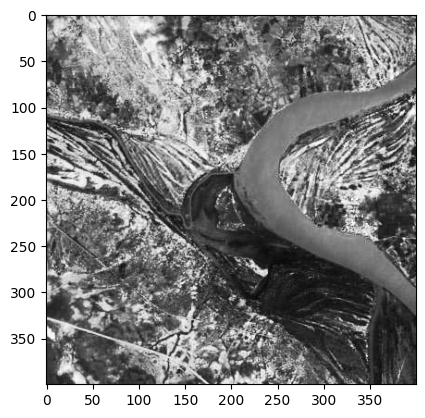

In [106]:
plt.imshow(g,cmap="gray")

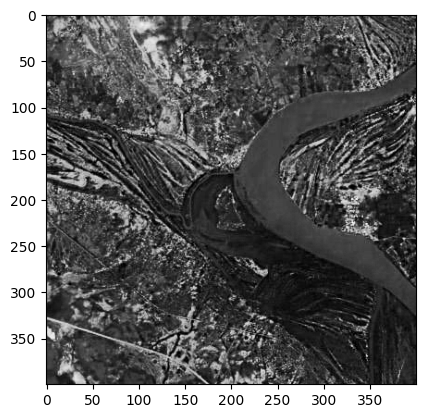

In [107]:
plt.imshow(b,cmap="gray")

In [112]:
# gray_jpeg=cv2.cvtColor(jpeg_img, cv2.COLOR_BGR2GRAY)


# for i in range(n):
#     for j in range(m):
#         gray_jpeg[i][j]=int(arr[gray_jpeg[i][j]])


# hist,bins = np.histogram(gray_jpeg,256,range=(0,256))
# print(gray_jpeg)
# plt.hist(gray_jpeg.flatten(),bins,[0,256], color = 'r')

# plt.show()

